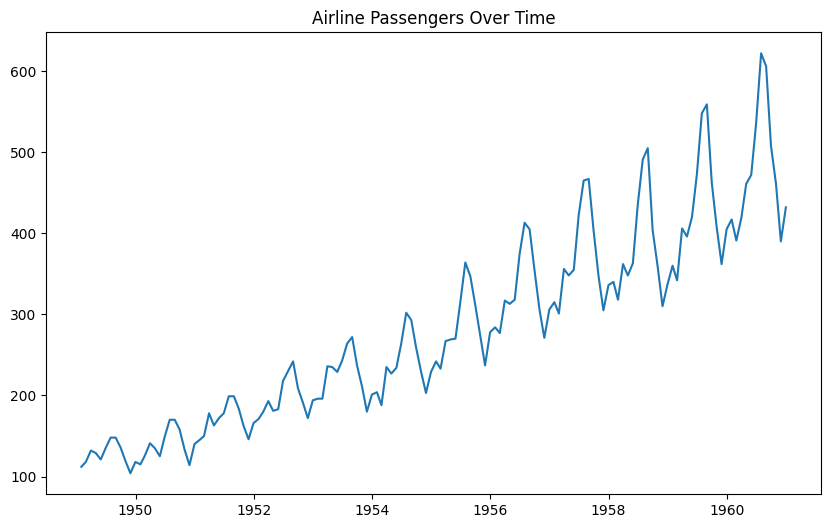

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import statsmodels.api as sm

# Load the dataset
data = sm.datasets.get_rdataset('AirPassengers').data
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.plot(data['value'])
plt.title('Airline Passengers Over Time')
plt.show()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['value'].values.reshape(-1, 1))

In [6]:
# Function to create the supervised learning problem
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3
X, y = create_dataset(data_scaled, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [7]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=100, batch_size=1, verbose=2)

# Predictions
predictions = model.predict(X)

Epoch 1/100
140/140 - 9s - loss: 0.0400 - 9s/epoch - 65ms/step
Epoch 2/100
140/140 - 1s - loss: 0.0126 - 882ms/epoch - 6ms/step
Epoch 3/100
140/140 - 1s - loss: 0.0119 - 970ms/epoch - 7ms/step
Epoch 4/100
140/140 - 1s - loss: 0.0108 - 839ms/epoch - 6ms/step
Epoch 5/100
140/140 - 1s - loss: 0.0101 - 873ms/epoch - 6ms/step
Epoch 6/100
140/140 - 1s - loss: 0.0095 - 826ms/epoch - 6ms/step
Epoch 7/100
140/140 - 1s - loss: 0.0095 - 759ms/epoch - 5ms/step
Epoch 8/100
140/140 - 1s - loss: 0.0092 - 823ms/epoch - 6ms/step
Epoch 9/100
140/140 - 1s - loss: 0.0093 - 799ms/epoch - 6ms/step
Epoch 10/100
140/140 - 2s - loss: 0.0088 - 2s/epoch - 11ms/step
Epoch 11/100
140/140 - 1s - loss: 0.0087 - 1s/epoch - 8ms/step
Epoch 12/100
140/140 - 1s - loss: 0.0080 - 1s/epoch - 11ms/step
Epoch 13/100
140/140 - 1s - loss: 0.0079 - 940ms/epoch - 7ms/step
Epoch 14/100
140/140 - 1s - loss: 0.0074 - 866ms/epoch - 6ms/step
Epoch 15/100
140/140 - 1s - loss: 0.0073 - 1s/epoch - 9ms/step
Epoch 16/100
140/140 - 2s - los

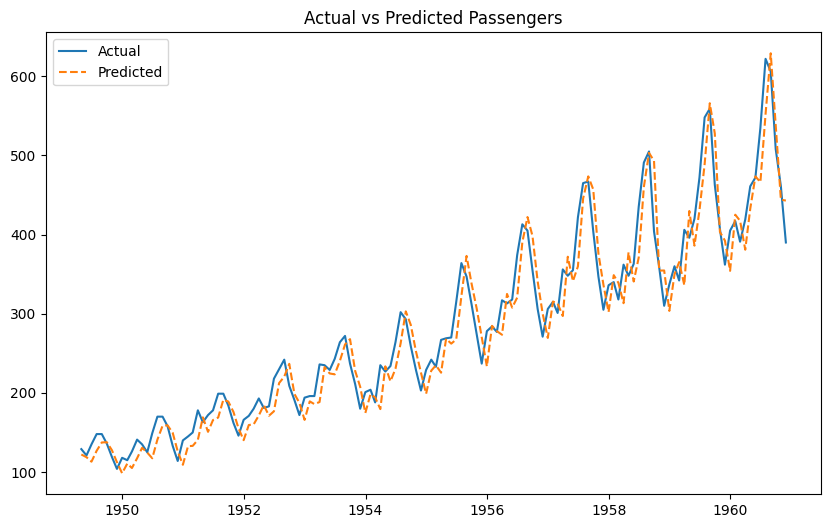

In [8]:
# Inverse transformation for plotting
predictions = scaler.inverse_transform(predictions)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(data.index[look_back:len(predictions)+look_back], data['value'][look_back:len(predictions)+look_back])
plt.plot(data.index[look_back:len(predictions)+look_back], predictions, linestyle='--')
plt.title('Actual vs Predicted Passengers')
plt.legend(['Actual', 'Predicted'])
plt.show()